# Ridge
Auto-generated notebook.

Due to the few points in each dimension and the straight line that linear regression uses to follow these points as well as it can, noise on the observations will cause great variance as shown in the first plot. Every line’s slope can vary quite a bit for each prediction due to the noise induced in the observations.

Ridge regression is basically minimizing a penalised version of the least-squared function. The penalising shrinks the value of the regression coefficients. Despite the few data points in each dimension, the slope of the prediction is much more stable and the variance in the line itself is greatly reduced, in comparison to that of the standard linear regression.

Here, α (alpha) is the parameter which balances the amount of emphasis given to minimizing RSS vs minimizing sum of square of coefficients. α can take various values:

    α = 0:
        The objective becomes same as simple linear regression.
        We’ll get the same coefficients as simple linear regression.
    α = ∞:
        The coefficients will be zero. Why? Because of infinite weightage on square of coefficients, anything less than zero will make the objective infinite.
    0 < α < ∞:
        The magnitude of α will decide the weightage given to different parts of objective.
        The coefficients will be somewhere between 0 and ones for simple linear regression.


https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/

In [1]:
from sklearn import linear_model
import pandas as pd
import numpy as np
import os, sys, plotly.graph_objects as go
module_path = os.path.abspath(os.path.join('../../../../..'))
if module_path not in sys.path:
    sys.path.append(module_path) 
  
from erudition.learning.modules.sklearn.GeneralizedLinearModels.helper import helper
from erudition.learning.helpers.plots.plotly_render import render, scatter

pd.options.display.float_format = '{:,.2g}'.format
np.random.seed(42) 

# Prepare data

This resembles a sine curve but not exactly because of the noise. We’ll use this as an example to test different scenarios in this article. Let’s try to estimate the sine function using polynomial regression with powers of x from 1 to 20. Let’s add a column for each power upto 20 in our dataframe. This can be accomplished using the following code:

In [4]:
df = helper.data_sin_wave()

power = 10

for i in range(2,power):
    colname = 'x_%d'%i
    df[colname] = df['x']**i

# Plot results

/home/jez/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.

/home/jez/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.

/home/jez/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.

/home/jez/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.

/home/jez/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning:

The default value of cv will

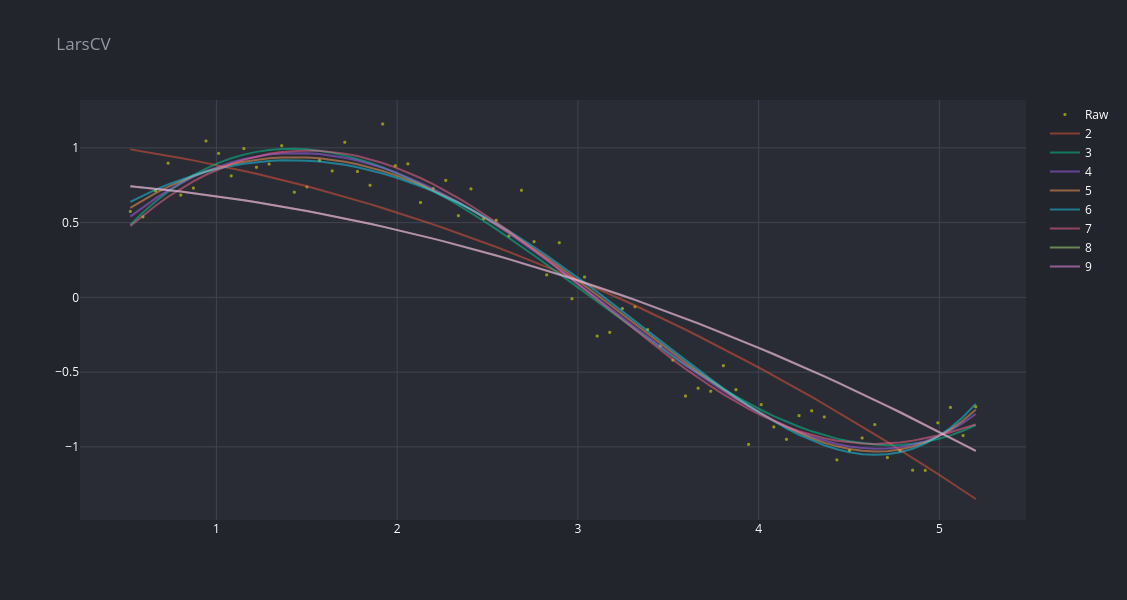

In [13]:
model = linear_model.LarsCV()

data = [scatter(df.x, df.y, 'Raw', mode='markers', color='yellow')]

#Initialize a dataframe to store the results:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,power)]
ind = ['model_pow_%d'%i for i in range(1,power)]
coef_matrix = pd.DataFrame(index=ind, columns=col)

for i in range(2,power):
    plot, res = helper.regression(df, i, model, plot_name=i)
    data.append(plot)
    coef_matrix.iloc[i-1,0:i+2] = res

fig = go.Figure(data=data)
render(fig, title=type(model).__name__, height=600, width=600)

coef_matrix.to_csv('{}.csv'.format(type(model).__name__))